In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('gaze.txt', 
	names=['centre', 'radius', 
		'face_x', 'face_y','face_w','face_h',
		'eye_x', 'eye_y','eye_w','eye_h',
		'gaze']
		)

In [3]:
data.head()

,centre,radius,face_x,face_y,face_w,face_h,eye_x,eye_y,eye_w,eye_h,gaze
0,95.5,122.5,492,248,310,310,53,86,73,73,IN
1,95.5,118.5,495,253,308,308,49,79,75,75,IN
2,95.5,120.5,495,252,307,307,51,80,75,75,IN
3,99.5,125.5,493,246,317,317,57,89,72,72,IN
4,98.5,122.5,492,248,314,314,55,86,72,72,IN


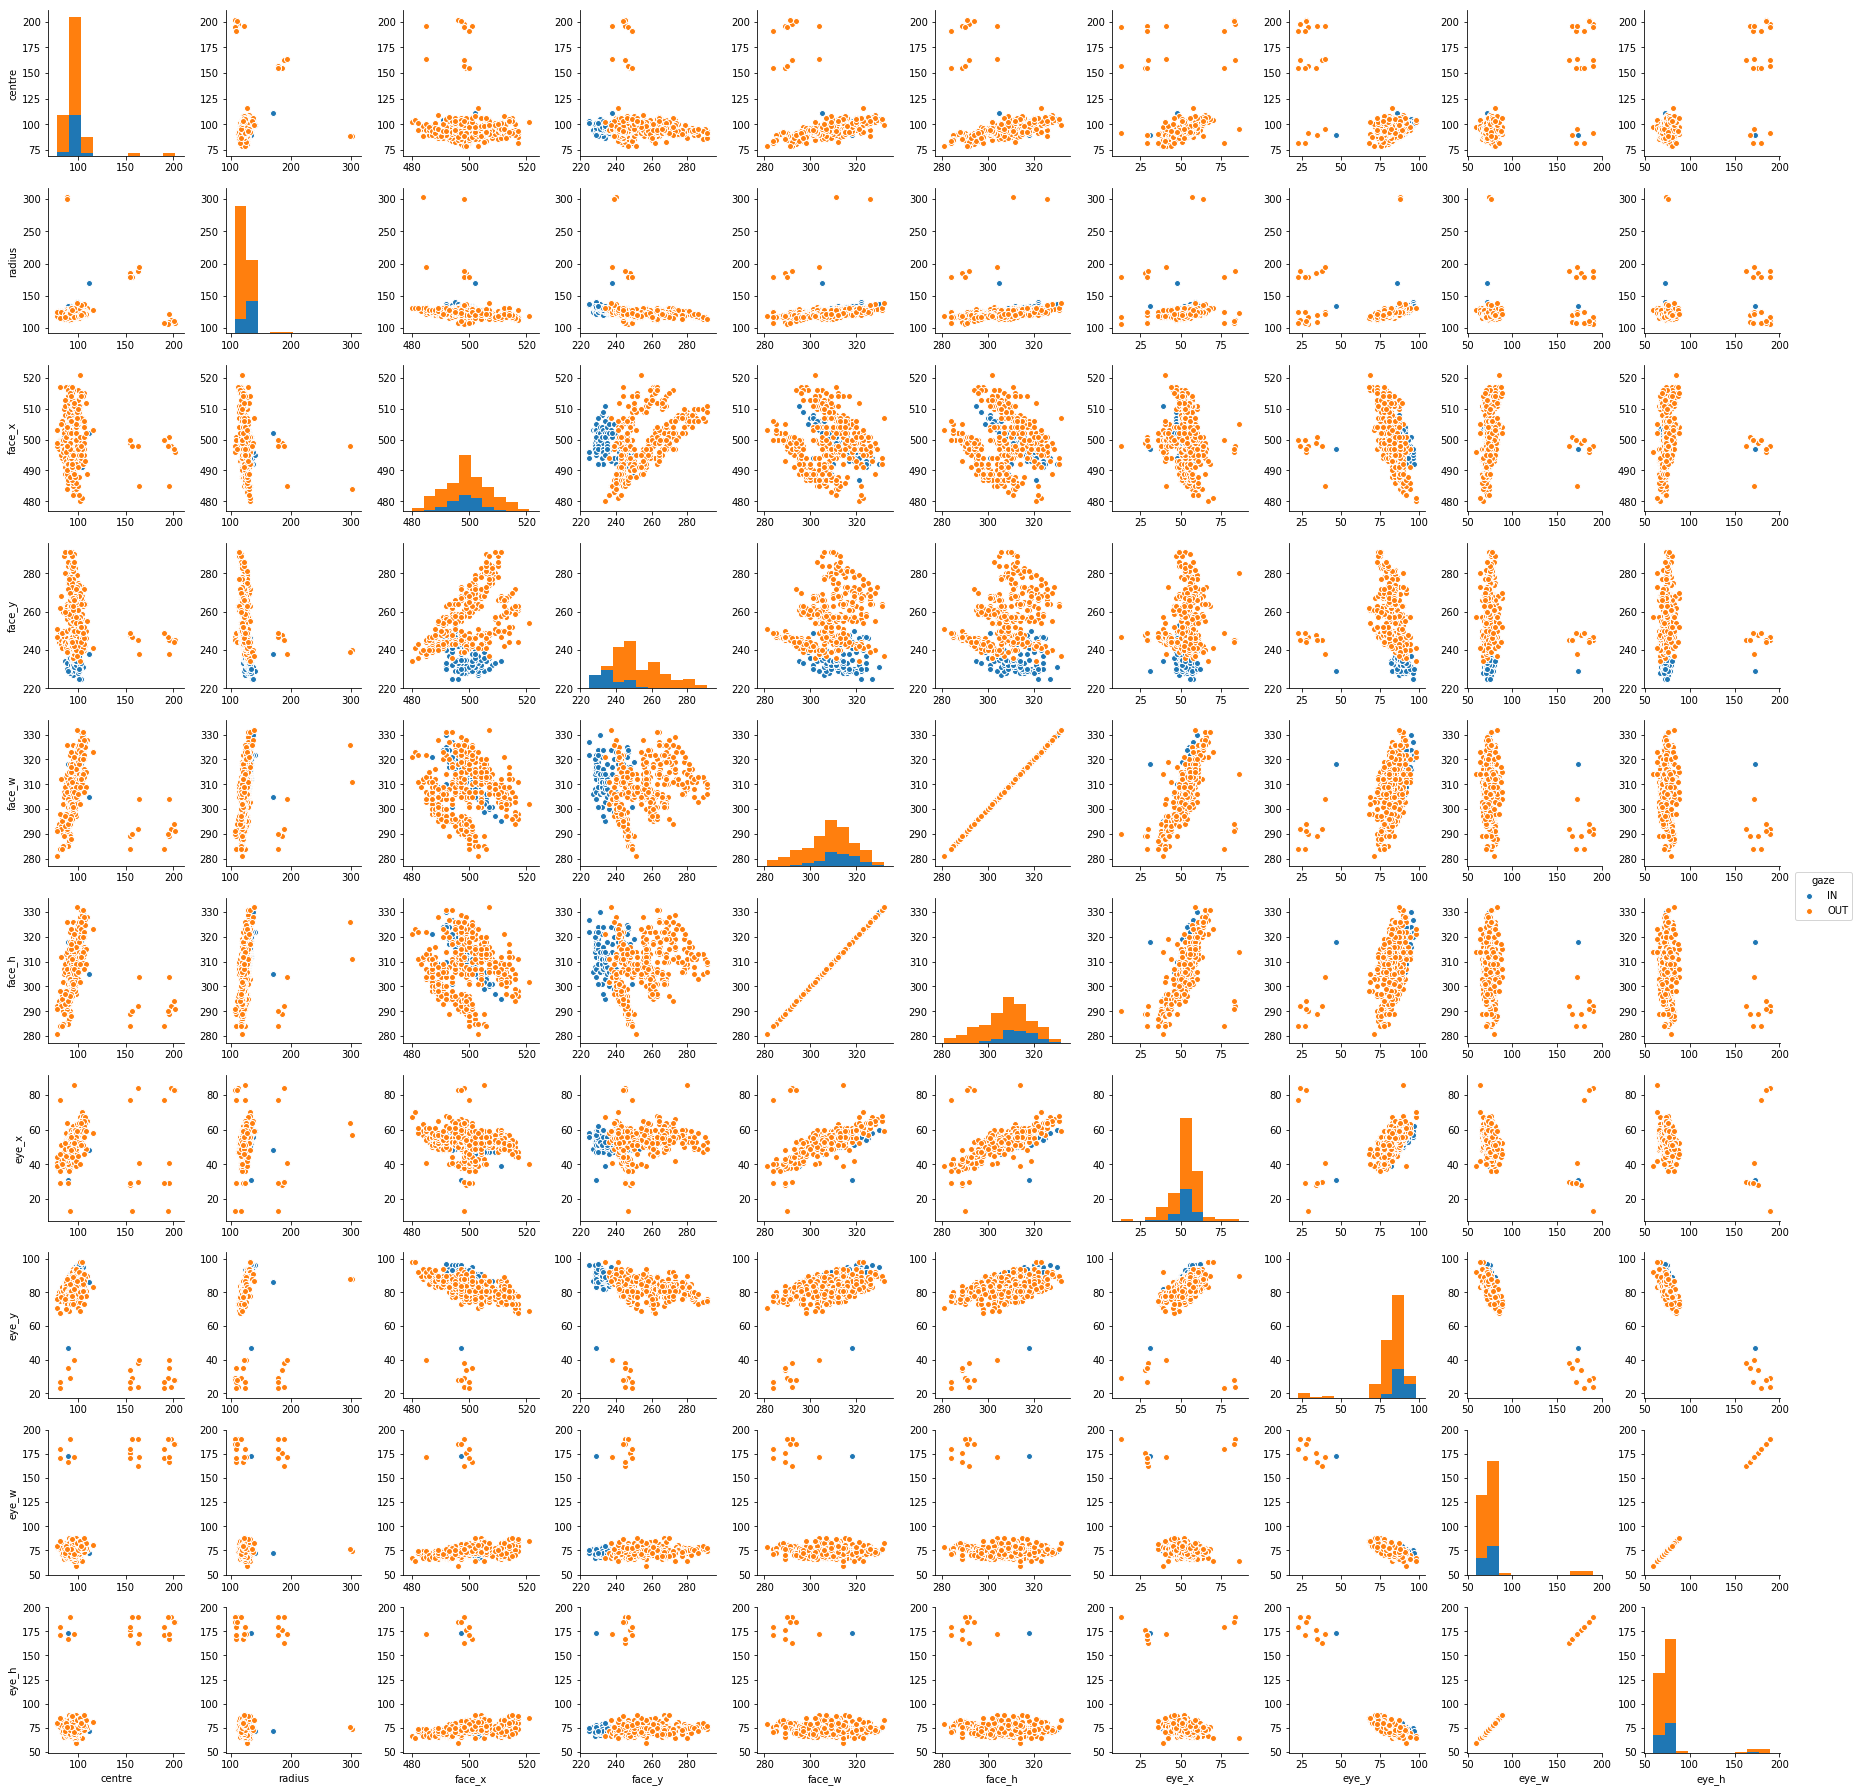

In [4]:
sns.pairplot(data=data, hue='gaze')

In [5]:
from sklearn.model_selection import train_test_split
x = data.drop('gaze', axis=1)
y = data['gaze']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rfc = RandomForestClassifier(n_estimators=200)
tree = DecisionTreeClassifier()

In [7]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
prediction_forest = rfc.predict(x_test)
prediction_tree = tree.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print('Random Forest')
print(classification_report(y_test, prediction_forest))
print('Decision Tree')
print(classification_report(y_test, prediction_tree))

             precision    recall  f1-score   support

         IN       0.92      0.81      0.86        27
        OUT       0.95      0.98      0.96        98

avg / total       0.94      0.94      0.94       125

             precision    recall  f1-score   support

         IN       0.96      0.93      0.94        27
        OUT       0.98      0.99      0.98        98

avg / total       0.98      0.98      0.98       125



In [14]:
print('Random Forest')
print(confusion_matrix(y_test, prediction_forest))
print('Decision Tree')
print(confusion_matrix(y_test, prediction_tree))

Random Forest
[[22  5]
 [ 2 96]]
Decision Tree
[[25  2]
 [ 1 97]]
